In [1]:
import pickle
import _pickle as cpickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime
import matplotlib.dates as mdates
import scipy.signal as sps
import xarray as xr

%matplotlib inline

/home/student.unimelb.edu.au/rursino/anaconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


This notebook introduces a linear regression analysis between uptake and time and uptake and CO2 concentration using Peylin global integrated fluxes and a weighting of CO2 concentration.

UPTAKE: Use one model of fluxes. Use pickle of spatially integrated fluxes (which is essentially just flux data at monthly resolution.

CO2: In CO2 folder.

# Flux against time

In [2]:
fRayner = open('./../Output/output_raw/output_all/Rayner_all/year.pik', 'rb')
Rayner = pickle.load(fRayner)
Rayner

<xarray.Dataset>
Dimensions:         (time: 21)
Coordinates:
  * time            (time) object 1992-12-30 00:00:00 ... 2012-12-30 00:00:00
Data variables:
    Earth_Land      (time) float64 -2.447 -3.349 -0.7345 ... -4.192 -2.768
    South_Land      (time) float64 0.224 -0.3685 0.2921 ... -0.7236 -0.12
    Tropical_Land   (time) float64 -0.8121 -0.3696 0.5733 ... -0.5483 0.6304
    North_Land      (time) float64 -1.859 -2.611 -1.6 ... -2.7 -2.92 -3.279
    Earth_Ocean     (time) float64 -0.2522 1.241 0.113 ... 0.1794 -0.1197
    South_Ocean     (time) float64 0.5105 1.078 0.5778 ... 0.4099 0.6217 0.3392
    Tropical_Ocean  (time) float64 -0.4834 -0.01013 -0.4716 ... -0.3309 -0.3562
    North_Ocean     (time) float64 -0.2793 0.1733 0.006788 ... -0.1114 -0.1026

In [3]:
def cftime_to_datetime(time_array, format='%Y-%m'):
    '''
    Takes a xr.DataArray of cftime values and converts it to a list of datetimes.
    
    Variables
    ---
    time_array: xr.DataArray of cftime values.
    format: format of datetime.
    ---
    '''
    
    time_list = []
    for time in time_array.values:
        time_value = datetime.strptime(time.strftime('%Y-%m'), '%Y-%m')
        time_list.append(time_value)
    
    return time_list

In [4]:
Rayner_time = cftime_to_datetime(Rayner.time)
Rayner_time

[datetime.datetime(1992, 12, 1, 0, 0),
 datetime.datetime(1993, 12, 1, 0, 0),
 datetime.datetime(1994, 12, 1, 0, 0),
 datetime.datetime(1995, 12, 1, 0, 0),
 datetime.datetime(1996, 12, 1, 0, 0),
 datetime.datetime(1997, 12, 1, 0, 0),
 datetime.datetime(1998, 12, 1, 0, 0),
 datetime.datetime(1999, 12, 1, 0, 0),
 datetime.datetime(2000, 12, 1, 0, 0),
 datetime.datetime(2001, 12, 1, 0, 0),
 datetime.datetime(2002, 12, 1, 0, 0),
 datetime.datetime(2003, 12, 1, 0, 0),
 datetime.datetime(2004, 12, 1, 0, 0),
 datetime.datetime(2005, 12, 1, 0, 0),
 datetime.datetime(2006, 12, 1, 0, 0),
 datetime.datetime(2007, 12, 1, 0, 0),
 datetime.datetime(2008, 12, 1, 0, 0),
 datetime.datetime(2009, 12, 1, 0, 0),
 datetime.datetime(2010, 12, 1, 0, 0),
 datetime.datetime(2011, 12, 1, 0, 0),
 datetime.datetime(2012, 12, 1, 0, 0)]

In [5]:
Rayner_u_time = Rayner.assign_coords(time=Rayner_time)

In [6]:
Rayner_u_time

<xarray.Dataset>
Dimensions:         (time: 21)
Coordinates:
  * time            (time) datetime64[ns] 1992-12-01 1993-12-01 ... 2012-12-01
Data variables:
    Earth_Land      (time) float64 -2.447 -3.349 -0.7345 ... -4.192 -2.768
    South_Land      (time) float64 0.224 -0.3685 0.2921 ... -0.7236 -0.12
    Tropical_Land   (time) float64 -0.8121 -0.3696 0.5733 ... -0.5483 0.6304
    North_Land      (time) float64 -1.859 -2.611 -1.6 ... -2.7 -2.92 -3.279
    Earth_Ocean     (time) float64 -0.2522 1.241 0.113 ... 0.1794 -0.1197
    South_Ocean     (time) float64 0.5105 1.078 0.5778 ... 0.4099 0.6217 0.3392
    Tropical_Ocean  (time) float64 -0.4834 -0.01013 -0.4716 ... -0.3309 -0.3562
    North_Ocean     (time) float64 -0.2793 0.1733 0.006788 ... -0.1114 -0.1026

## Whole period

/home/student.unimelb.edu.au/rursino/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


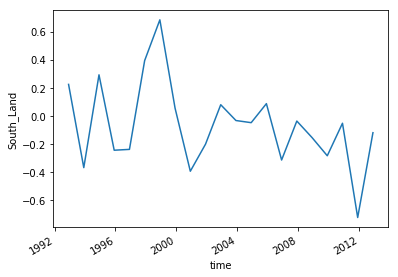

In [7]:
# Plot global land against time
Rayner_u_time.South_Land.plot()

In [8]:
int(Rayner_time[0].strftime(format='%Y'))

1992

In [9]:
Rayner_year = []
for time in Rayner_time:
    Rayner_year.append(float(time.strftime(format='%Y')))
Rayner_year = np.array(Rayner_year)
Rayner_year

array([1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000.,
       2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012.])

LinregressResult(slope=-0.08592789566207787, intercept=170.06839535081826, rvalue=-0.4275193100143103, pvalue=0.05321801467867693, stderr=0.041684352249547744)


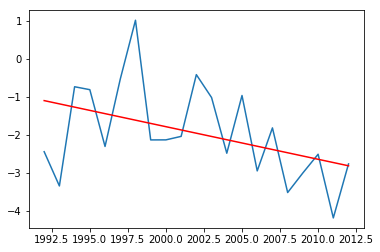

In [10]:
# Linear regression: global land uptake vs. time
reg_land = stats.linregress(Rayner_year, Rayner.Earth_Land.values)
slope_land = reg_land[0]
intercept_land = reg_land[1]

line = slope_land*Rayner_year+intercept_land

plt.plot(Rayner_year, Rayner.Earth_Land)
plt.plot(Rayner_year, line, color ='r')
print(reg_land)

## Decade trend in regression

In [11]:
fdRayner = open('./../Output/output_raw/output_all/Rayner_all/decade.pik', 'rb')
dRayner = pickle.load(fdRayner)
dRayner

<xarray.Dataset>
Dimensions:         (time: 3)
Coordinates:
  * time            (time) object 1992-12-30 00:00:00 ... 2012-12-30 00:00:00
Data variables:
    Earth_Land      (time) float64 -2.447 -13.45 -25.25
    South_Land      (time) float64 0.224 0.05579 -1.681
    Tropical_Land   (time) float64 -0.8121 6.359 3.162
    North_Land      (time) float64 -1.859 -19.86 -26.73
    Earth_Ocean     (time) float64 -0.2522 1.816 -0.7396
    South_Ocean     (time) float64 0.5105 6.117 5.302
    Tropical_Ocean  (time) float64 -0.4834 -4.186 -4.15
    North_Ocean     (time) float64 -0.2793 -0.1153 -1.892

In [12]:
dRayner_time = cftime_to_datetime(dRayner.time)
dRayner_time

[datetime.datetime(1992, 12, 1, 0, 0),
 datetime.datetime(2002, 12, 1, 0, 0),
 datetime.datetime(2012, 12, 1, 0, 0)]

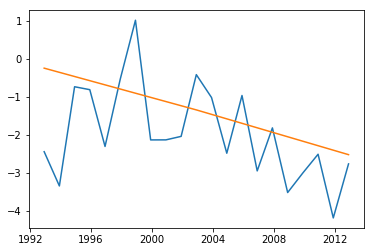

In [13]:
plt.plot(Rayner_time, Rayner.Earth_Land.values)
plt.plot(dRayner_time, dRayner.Earth_Land.values/10)

In [14]:
Rayner_year[10:20]

array([2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
       2011.])

LinregressResult(slope=0.07512226413579669, intercept=-151.52969035603095, rvalue=0.17990328581738485, pvalue=0.6189530752251279, stderr=0.14522464415288733)
LinregressResult(slope=-0.3247972816965547, intercept=649.4162433880207, rvalue=-0.8093827674558631, pvalue=0.004556866505672447, stderr=0.08332201108534462)


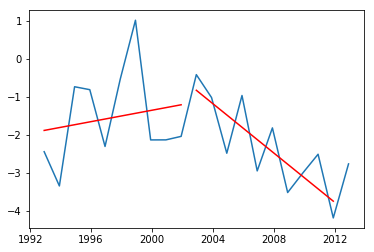

In [15]:
plt.plot(Rayner_time, Rayner.Earth_Land)

reg_land = stats.linregress(Rayner_year[:10], Rayner.Earth_Land[:10])
slope_land = reg_land[0]
intercept_land = reg_land[1]

line_i = slope_land*Rayner_year[:10]+intercept_land
plt.plot(Rayner_time[:10], line_i, color ='r')
print(reg_land)

reg_land = stats.linregress(Rayner_year[10:20], Rayner.Earth_Land[10:20])
slope_land = reg_land[0]
intercept_land = reg_land[1]

line_i = slope_land*Rayner_year[10:20]+intercept_land
plt.plot(Rayner_time[10:20], line_i, color ='r')
print(reg_land)

# Flux against CO2

## Weighting of Mount Loa and South Pole

### Month

In [80]:
ml_co2_month = pd.read_csv('./../co2_data/co2_mount_loa.csv')
so_co2_month = pd.read_csv('./../co2_data/co2_south_pole.csv')

In [81]:
ml_co2_month.CO2[ml_co2_month.CO2==-99.99]=np.nan
ml_co2_month = ml_co2_month.interpolate()

In [82]:
so_co2_month.CO2[so_co2_month.CO2==-99.99]=np.nan
so_co2_month = so_co2_month.interpolate()

In [83]:
co2_month = 0.75*ml_co2_month + 0.25*so_co2_month

In [84]:
co2_month.to_csv('weighted_co2_month.csv')

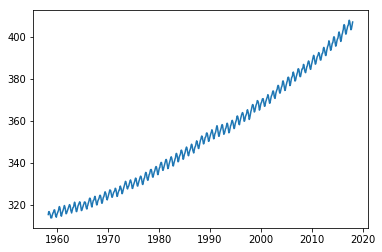

In [85]:
plt.plot(co2_month.Date, co2_month.CO2)

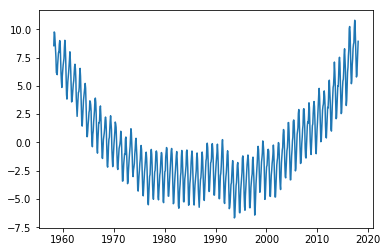

In [86]:
plt.plot(co2_month.Date, sps.detrend(co2_month.CO2))

### Year

In [87]:
co2_global = pd.read_csv('./../co2_data/co2_global.csv')
co2_global.set_index('Year', inplace=True)

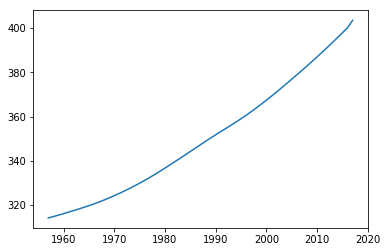

In [88]:
plt.plot(co2_global.index, co2_global.CO2)

## Whole period

In [105]:
co2_Rayner = co2_global.loc[1992:2012]

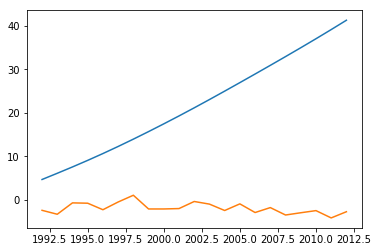

In [106]:
plt.plot(co2_Rayner.index, co2_Rayner.CO2-350)
plt.plot(co2_Rayner.index, Rayner.Earth_Land)

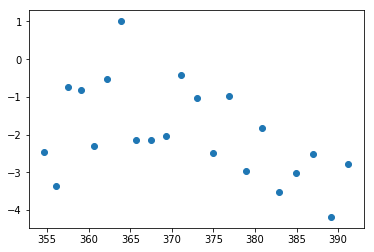

In [107]:
plt.scatter(co2_Rayner.CO2,Rayner.Earth_Land)

LinregressResult(slope=-0.04920333235283114, intercept=16.33332883589132, rvalue=-0.4520378837039896, pvalue=0.03965781793248463, stderr=0.022274456918048136)


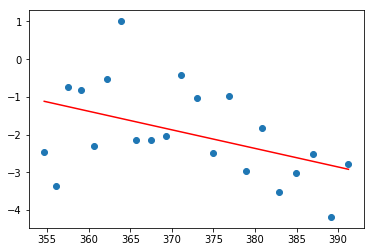

In [94]:
# Linear regression: global land uptake vs. time
reg_land = stats.linregress(co2_Rayner.CO2, Rayner.Earth_Land)
slope_land = reg_land[0]
intercept_land = reg_land[1]

line = slope_land*co2_Rayner.CO2+intercept_land

plt.scatter(co2_Rayner.CO2, Rayner.Earth_Land)
plt.plot(co2_Rayner.CO2, line, color ='r')
print(reg_land)

## Decade trend in regression

LinregressResult(slope=0.04025365177607461, intercept=-16.105247546509876, rvalue=0.15666739584555994, pvalue=0.6655786211230958, stderr=0.08971919322388185)
LinregressResult(slope=-0.1623953761886217, intercept=59.4154627658337, rvalue=-0.808327774031994, pvalue=0.004652255561527619, stderr=0.04181762216804639)


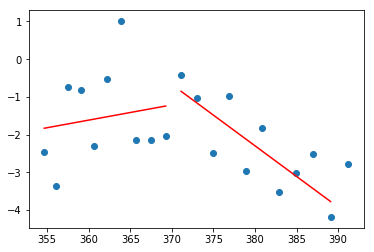

In [112]:
plt.scatter(co2_Rayner.CO2, Rayner.Earth_Land)

reg_land = stats.linregress(co2_Rayner.iloc[:10].CO2, Rayner.Earth_Land[:10])
slope_land = reg_land[0]
intercept_land = reg_land[1]

line_ii = slope_land*co2_Rayner.iloc[:10].CO2+intercept_land
plt.plot(co2_Rayner.iloc[:10].CO2, line_ii, color ='r')
print(reg_land)

reg_land = stats.linregress(co2_Rayner.iloc[10:20].CO2, Rayner.Earth_Land[10:20])
slope_land = reg_land[0]
intercept_land = reg_land[1]

line_ii = slope_land*co2_Rayner.iloc[10:20].CO2+intercept_land
plt.plot(co2_Rayner.iloc[10:20].CO2, line_ii, color ='r')
print(reg_land)

# Integration into INVF Analysis Class

In [2]:
import sys
sys.path.append('./../Scripts')
import inv_flux as invf

In [3]:
import importlib as ilib
ilib.reload(invf)

<module 'inv_flux' from './../Scripts/inv_flux.py'>

In [4]:
def cftime_to_datetime(self, format='%Y-%m'):
    """Takes a xr.Dataset with cftime values and converts them into datetimes.

    Parameters
    ----------
    self: xr.Dataset.
    format: format of datetime.
    ----------
    """

    time_list = []
    for time in self.data.time.values:
        time_value = datetime.strptime(time.strftime('%Y-%m'), '%Y-%m')
        time_list.append(time_value)

    return self.data.assign_coords(time=time_list)

In [5]:
fRayner = open('./../Output/output_raw/output_all/Rayner_all/year.pik', 'rb')
Rayner = pickle.load(fRayner)
Rayner = invf.Analysis(Rayner)

In [6]:
Rayner = invf.Analysis(Rayner.cftime_to_datetime())
Rayner.data

<xarray.Dataset>
Dimensions:         (time: 21)
Coordinates:
  * time            (time) datetime64[ns] 1992-12-01 1993-12-01 ... 2012-12-01
Data variables:
    Earth_Land      (time) float64 -2.447 -3.349 -0.7345 ... -4.192 -2.768
    South_Land      (time) float64 0.224 -0.3685 0.2921 ... -0.7236 -0.12
    Tropical_Land   (time) float64 -0.8121 -0.3696 0.5733 ... -0.5483 0.6304
    North_Land      (time) float64 -1.859 -2.611 -1.6 ... -2.7 -2.92 -3.279
    Earth_Ocean     (time) float64 -0.2522 1.241 0.113 ... 0.1794 -0.1197
    South_Ocean     (time) float64 0.5105 1.078 0.5778 ... 0.4099 0.6217 0.3392
    Tropical_Ocean  (time) float64 -0.4834 -0.01013 -0.4716 ... -0.3309 -0.3562
    North_Ocean     (time) float64 -0.2793 0.1733 0.006788 ... -0.1114 -0.1026

In [19]:
x1=Rayner.data['time'].values[0:11]
x2=Rayner.data['time'].values[10:21]
x3=Rayner.data['time'].values[8:19]

In [21]:
x3

array(['2000-12-01T00:00:00.000000000', '2001-12-01T00:00:00.000000000',
       '2002-12-01T00:00:00.000000000', '2003-12-01T00:00:00.000000000',
       '2004-12-01T00:00:00.000000000', '2005-12-01T00:00:00.000000000',
       '2006-12-01T00:00:00.000000000', '2007-12-01T00:00:00.000000000',
       '2008-12-01T00:00:00.000000000', '2009-12-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [22]:
time_dict={'1992-2001':x1, '2002-2011':x2, '2000:2010': x3}

In [23]:
time_dict.keys()

dict_keys(['1992-2001', '2002-2011', '2000:2010'])

In [24]:
pickle.dump(time_dict, open('./../Scripts/lin_reg_times/Rayner_lrtime.pik', 'wb'))

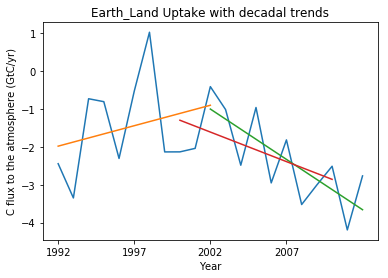

In [25]:
p=Rayner.linear_regression_time(time_dict,'Earth_Land', save_plot=True)

In [26]:
p['1992-2001']

LinregressResult(slope=0.10782160796491772, intercept=-216.76488129512742, rvalue=0.28676119398123706, pvalue=0.39257624042010497, stderr=0.12006892690661833)

In [27]:
fCAMS = open('./../Output/output_raw/output_all/CAMS_all/year.pik', 'rb')
CAMS = pickle.load(fCAMS)
CAMS = invf.Analysis(CAMS)

In [28]:
CAMS = invf.Analysis(CAMS.cftime_to_datetime())
CAMS.data

<xarray.Dataset>
Dimensions:         (time: 39)
Coordinates:
  * time            (time) datetime64[ns] 1979-12-01 1980-12-01 ... 2017-12-01
Data variables:
    Earth_Land      (time) float64 -0.3236 -0.2909 -1.424 ... -2.248 -3.845
    South_Land      (time) float64 -0.06017 0.09 0.05536 ... 0.08921 0.08088
    Tropical_Land   (time) float64 2.072 1.62 0.4356 ... 0.824 0.6507 -1.083
    North_Land      (time) float64 -2.335 -2.001 -1.915 ... -2.95 -2.988 -2.843
    Earth_Ocean     (time) float64 -1.054 -1.139 -1.101 ... -1.933 -2.067 -2.189
    South_Ocean     (time) float64 -0.9933 -1.133 -1.017 ... -1.448 -1.562
    Tropical_Ocean  (time) float64 0.8567 0.8374 0.8029 ... 0.4387 0.3609 0.3218
    North_Ocean     (time) float64 -0.9174 -0.8442 -0.8868 ... -0.9797 -0.9491

In [46]:
x1=CAMS.data['time'].values[1:12]
x2=CAMS.data['time'].values[11:22]
x3=CAMS.data['time'].values[21:32]
x4=CAMS.data['time'].values[28:39]

In [52]:
x4

array(['2007-12-01T00:00:00.000000000', '2008-12-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2010-12-01T00:00:00.000000000',
       '2011-12-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2013-12-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2015-12-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [56]:
CAMS_time = {'1980-1990': x1, '1990-2000': x2, '2000-2010': x3, '2007-2017':x4}

In [57]:
CAMS_time

{'1980-1990': array(['1980-12-01T00:00:00.000000000', '1981-12-01T00:00:00.000000000',
        '1982-12-01T00:00:00.000000000', '1983-12-01T00:00:00.000000000',
        '1984-12-01T00:00:00.000000000', '1985-12-01T00:00:00.000000000',
        '1986-12-01T00:00:00.000000000', '1987-12-01T00:00:00.000000000',
        '1988-12-01T00:00:00.000000000', '1989-12-01T00:00:00.000000000',
        '1990-12-01T00:00:00.000000000'], dtype='datetime64[ns]'),
 '1990-2000': array(['1990-12-01T00:00:00.000000000', '1991-12-01T00:00:00.000000000',
        '1992-12-01T00:00:00.000000000', '1993-12-01T00:00:00.000000000',
        '1994-12-01T00:00:00.000000000', '1995-12-01T00:00:00.000000000',
        '1996-12-01T00:00:00.000000000', '1997-12-01T00:00:00.000000000',
        '1998-12-01T00:00:00.000000000', '1999-12-01T00:00:00.000000000',
        '2000-12-01T00:00:00.000000000'], dtype='datetime64[ns]'),
 '2000-2010': array(['2000-12-01T00:00:00.000000000', '2001-12-01T00:00:00.000000000',
        '2002

In [58]:
pickle.dump(CAMS_time, open('./../Scripts/lin_reg_times/CAMS_lrtime.pik', 'wb'))

{'1980-1990': LinregressResult(slope=-0.0992962947197408, intercept=196.08549565857936, rvalue=-0.29419181301794234, pvalue=0.3798689774450673, stderr=0.10752857127745945),
 '1990-2000': LinregressResult(slope=0.10037711034542376, intercept=-202.12100160497494, rvalue=0.313185901212477, pvalue=0.3483526012655447, stderr=0.1014597850303833),
 '2000-2010': LinregressResult(slope=-0.16353001267372255, intercept=325.56138590180717, rvalue=-0.5775978070606398, pvalue=0.06276318641173301, stderr=0.07703922567901021),
 '2007-2017': LinregressResult(slope=4.2907732557209955e-05, intercept=-2.983559535084221, rvalue=0.00019942144481568288, pvalue=0.9995357051285453, stderr=0.07172035709544824)}

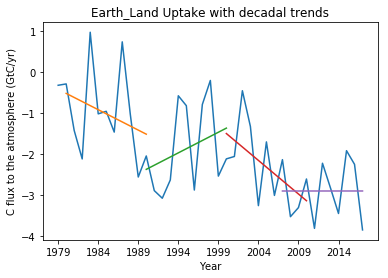

In [59]:
CAMS.linear_regression_time(CAMS_time,'Earth_Land')

In [60]:
fCTRACKER = open('./../Output/output_raw/output_all/CTRACKER_all/year.pik', 'rb')
CTRACKER = pickle.load(fCTRACKER)
CTRACKER = invf.Analysis(CTRACKER)

In [61]:
CTRACKER = invf.Analysis(CTRACKER.cftime_to_datetime())
CTRACKER.data

<xarray.Dataset>
Dimensions:         (time: 18)
Coordinates:
  * time            (time) datetime64[ns] 2000-12-01 2001-12-01 ... 2017-12-01
Data variables:
    Earth_Land      (time) float64 -2.742 -1.927 -0.6271 ... -1.549 -2.084
    South_Land      (time) float64 -0.3934 -0.04637 0.1594 ... 0.04587 -0.1798
    Tropical_Land   (time) float64 -0.19 -0.5015 0.2291 ... 0.09549 0.1698
    North_Land      (time) float64 -2.159 -1.379 -1.016 ... -1.746 -1.691 -2.075
    Earth_Ocean     (time) float64 -2.603 -1.591 -1.366 ... -2.248 -1.883 -3.076
    South_Ocean     (time) float64 -1.564 -1.124 -1.02 ... -1.439 -1.448 -1.815
    Tropical_Ocean  (time) float64 0.3306 0.6103 0.8359 ... 0.3406 0.001975
    North_Ocean     (time) float64 -1.37 -1.078 -1.182 ... -1.066 -0.7751 -1.263

In [70]:
x1=CTRACKER.data['time'].values[:11]
x2=CTRACKER.data['time'].values[7:]

In [71]:
x2

array(['2007-12-01T00:00:00.000000000', '2008-12-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2010-12-01T00:00:00.000000000',
       '2011-12-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2013-12-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2015-12-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [72]:
CTRACKER_time = {'2000-2010': x1, '2007-2017':x2}
CTRACKER_time

{'2000-2010': array(['2000-12-01T00:00:00.000000000', '2001-12-01T00:00:00.000000000',
        '2002-12-01T00:00:00.000000000', '2003-12-01T00:00:00.000000000',
        '2004-12-01T00:00:00.000000000', '2005-12-01T00:00:00.000000000',
        '2006-12-01T00:00:00.000000000', '2007-12-01T00:00:00.000000000',
        '2008-12-01T00:00:00.000000000', '2009-12-01T00:00:00.000000000',
        '2010-12-01T00:00:00.000000000'], dtype='datetime64[ns]'),
 '2007-2017': array(['2007-12-01T00:00:00.000000000', '2008-12-01T00:00:00.000000000',
        '2009-12-01T00:00:00.000000000', '2010-12-01T00:00:00.000000000',
        '2011-12-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
        '2013-12-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
        '2015-12-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
        '2017-12-01T00:00:00.000000000'], dtype='datetime64[ns]')}

In [73]:
pickle.dump(CTRACKER_time, open('./../Scripts/lin_reg_times/CTRACKER_lrtime.pik', 'wb'))

In [74]:
fJAMSTEC = open('./../Output/output_raw/output_all/JAMSTEC_all/year.pik', 'rb')
JAMSTEC = pickle.load(fJAMSTEC)
JAMSTEC = invf.Analysis(JAMSTEC)

In [75]:
JAMSTEC = invf.Analysis(JAMSTEC.cftime_to_datetime())
JAMSTEC.data

<xarray.Dataset>
Dimensions:         (time: 22)
Coordinates:
  * time            (time) datetime64[ns] 1996-12-01 1997-12-01 ... 2017-12-01
Data variables:
    Earth_Land      (time) float64 -1.479 -0.7138 0.3837 ... -1.528 -3.608
    South_Land      (time) float64 -0.1174 0.1827 0.227 ... -0.2549 -0.8015
    Tropical_Land   (time) float64 0.216 0.8056 1.08 ... 0.4241 0.6761 -0.2213
    North_Land      (time) float64 -1.578 -1.702 -0.9229 ... -1.949 -2.585
    Earth_Ocean     (time) float64 -1.601 -1.256 -1.549 ... -1.854 -1.661 -2.086
    South_Ocean     (time) float64 -1.054 -1.208 -1.034 ... -1.385 -1.282 -1.396
    Tropical_Ocean  (time) float64 0.5292 1.014 0.7688 ... 0.667 0.8156 0.4163
    North_Ocean     (time) float64 -1.076 -1.062 -1.283 ... -1.136 -1.194 -1.106

In [87]:
x1=JAMSTEC.data['time'].values[:10]
x2=JAMSTEC.data['time'].values[4:15]
x3=JAMSTEC.data['time'].values[11:]

In [90]:
x3

array(['2007-12-01T00:00:00.000000000', '2008-12-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2010-12-01T00:00:00.000000000',
       '2011-12-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2013-12-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2015-12-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [91]:
JAMSTEC_time = {'1996-2005': x1, '2000-2010':x2, '2007-2017':x3}
JAMSTEC_time

{'1996-2005': array(['1996-12-01T00:00:00.000000000', '1997-12-01T00:00:00.000000000',
        '1998-12-01T00:00:00.000000000', '1999-12-01T00:00:00.000000000',
        '2000-12-01T00:00:00.000000000', '2001-12-01T00:00:00.000000000',
        '2002-12-01T00:00:00.000000000', '2003-12-01T00:00:00.000000000',
        '2004-12-01T00:00:00.000000000', '2005-12-01T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 '2000-2010': array(['2000-12-01T00:00:00.000000000', '2001-12-01T00:00:00.000000000',
        '2002-12-01T00:00:00.000000000', '2003-12-01T00:00:00.000000000',
        '2004-12-01T00:00:00.000000000', '2005-12-01T00:00:00.000000000',
        '2006-12-01T00:00:00.000000000', '2007-12-01T00:00:00.000000000',
        '2008-12-01T00:00:00.000000000', '2009-12-01T00:00:00.000000000',
        '2010-12-01T00:00:00.000000000'], dtype='datetime64[ns]'),
 '2007-2017': array(['2007-12-01T00:00:00.000000000', '2008-12-01T00:00:00.000000000',
        '2009-12-01T00:00:00.000000000', '2010-

In [92]:
pickle.dump(JAMSTEC_time, open('./../Scripts/lin_reg_times/JAMSTEC_lrtime.pik', 'wb'))

In [93]:
fJENA_s76 = open('./../Output/output_raw/output_all/JENA_s76_all/year.pik', 'rb')
JENA_s76 = pickle.load(fJENA_s76)
JENA_s76 = invf.Analysis(JENA_s76)

In [94]:
JENA_s76 = invf.Analysis(JENA_s76.cftime_to_datetime())
JENA_s76.data

<xarray.Dataset>
Dimensions:         (time: 42)
Coordinates:
  * time            (time) datetime64[ns] 1976-12-01 1977-12-01 ... 2017-12-01
Data variables:
    Earth_Land      (time) float64 -1.222 0.7018 -0.7247 ... -1.454 -2.908
    South_Land      (time) float64 0.2531 0.4294 0.3338 ... 0.1559 0.05055
    Tropical_Land   (time) float64 -0.1174 0.9037 0.4336 ... 0.3215 -0.5574
    North_Land      (time) float64 -1.358 -0.6313 -1.492 ... -1.932 -2.401
    Earth_Ocean     (time) float64 -1.859 -1.456 -1.633 ... -2.054 -2.099 -2.661
    South_Ocean     (time) float64 -1.274 -1.044 -1.236 ... -1.348 -1.48 -1.736
    Tropical_Ocean  (time) float64 0.4939 0.6844 0.7426 ... 0.44 0.5199 0.238
    North_Ocean     (time) float64 -1.079 -1.096 -1.14 ... -1.146 -1.139 -1.163

In [103]:
x1=JENA_s76.data['time'].values[0:10]
x2=JENA_s76.data['time'].values[4:15]
x3=JENA_s76.data['time'].values[14:25]
x4=JENA_s76.data['time'].values[24:35]
x5=JENA_s76.data['time'].values[31:42]

In [104]:
x5

array(['2007-12-01T00:00:00.000000000', '2008-12-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2010-12-01T00:00:00.000000000',
       '2011-12-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2013-12-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2015-12-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [105]:
JENA_s76_time = {'1976-1985': x1, '1980-1990': x2, '1990-2000': x3, '2000-2010':x4, '2007-2017':x5}
JENA_s76_time

{'1976-1985': array(['1976-12-01T00:00:00.000000000', '1977-12-01T00:00:00.000000000',
        '1978-12-01T00:00:00.000000000', '1979-12-01T00:00:00.000000000',
        '1980-12-01T00:00:00.000000000', '1981-12-01T00:00:00.000000000',
        '1982-12-01T00:00:00.000000000', '1983-12-01T00:00:00.000000000',
        '1984-12-01T00:00:00.000000000', '1985-12-01T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 '1980-1990': array(['1980-12-01T00:00:00.000000000', '1981-12-01T00:00:00.000000000',
        '1982-12-01T00:00:00.000000000', '1983-12-01T00:00:00.000000000',
        '1984-12-01T00:00:00.000000000', '1985-12-01T00:00:00.000000000',
        '1986-12-01T00:00:00.000000000', '1987-12-01T00:00:00.000000000',
        '1988-12-01T00:00:00.000000000', '1989-12-01T00:00:00.000000000',
        '1990-12-01T00:00:00.000000000'], dtype='datetime64[ns]'),
 '1990-2000': array(['1990-12-01T00:00:00.000000000', '1991-12-01T00:00:00.000000000',
        '1992-12-01T00:00:00.000000000', '1993-

In [106]:
pickle.dump(JENA_s76_time, open('./../Scripts/lin_reg_times/JENA_s76_lrtime.pik', 'wb'))

In [107]:
fJENA_s85 = open('./../Output/output_raw/output_all/JENA_s85_all/year.pik', 'rb')
JENA_s85 = pickle.load(fJENA_s85)
JENA_s85 = invf.Analysis(JENA_s85)

In [108]:
JENA_s85 = invf.Analysis(JENA_s85.cftime_to_datetime())
JENA_s85.data

<xarray.Dataset>
Dimensions:         (time: 33)
Coordinates:
  * time            (time) datetime64[ns] 1985-12-01 1986-12-01 ... 2017-12-01
Data variables:
    Earth_Land      (time) float64 -0.906 -1.275 0.5586 ... -1.617 -1.352 -3.108
    South_Land      (time) float64 0.2762 0.2733 0.4753 ... 0.1708 0.01879
    Tropical_Land   (time) float64 0.6037 0.06639 1.355 ... 0.4385 0.795 -0.4044
    North_Land      (time) float64 -1.786 -1.615 -1.271 ... -2.263 -2.317 -2.722
    Earth_Ocean     (time) float64 -1.451 -1.586 -1.357 ... -1.999 -2.15 -2.487
    South_Ocean     (time) float64 -1.184 -1.166 -0.9849 ... -1.569 -1.777
    Tropical_Ocean  (time) float64 0.7042 0.5695 0.6967 ... 0.4912 0.4836 0.3375
    North_Ocean     (time) float64 -0.9712 -0.9888 -1.068 ... -1.065 -1.048

In [118]:
x1=JENA_s85.data['time'].values[0:11]
x2=JENA_s85.data['time'].values[5:16]
x3=JENA_s85.data['time'].values[15:26]
x4=JENA_s85.data['time'].values[22:33]

In [122]:
x4

array(['2007-12-01T00:00:00.000000000', '2008-12-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2010-12-01T00:00:00.000000000',
       '2011-12-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2013-12-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2015-12-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [123]:
JENA_s85_time = {'1985-1995': x1, '1990-2000': x2, '2000-2010':x3, '2007-2017':x4}
JENA_s85_time

{'1985-1995': array(['1985-12-01T00:00:00.000000000', '1986-12-01T00:00:00.000000000',
        '1987-12-01T00:00:00.000000000', '1988-12-01T00:00:00.000000000',
        '1989-12-01T00:00:00.000000000', '1990-12-01T00:00:00.000000000',
        '1991-12-01T00:00:00.000000000', '1992-12-01T00:00:00.000000000',
        '1993-12-01T00:00:00.000000000', '1994-12-01T00:00:00.000000000',
        '1995-12-01T00:00:00.000000000'], dtype='datetime64[ns]'),
 '1990-2000': array(['1990-12-01T00:00:00.000000000', '1991-12-01T00:00:00.000000000',
        '1992-12-01T00:00:00.000000000', '1993-12-01T00:00:00.000000000',
        '1994-12-01T00:00:00.000000000', '1995-12-01T00:00:00.000000000',
        '1996-12-01T00:00:00.000000000', '1997-12-01T00:00:00.000000000',
        '1998-12-01T00:00:00.000000000', '1999-12-01T00:00:00.000000000',
        '2000-12-01T00:00:00.000000000'], dtype='datetime64[ns]'),
 '2000-2010': array(['2000-12-01T00:00:00.000000000', '2001-12-01T00:00:00.000000000',
        '2002

In [124]:
pickle.dump(JENA_s85_time, open('./../Scripts/lin_reg_times/JENA_s85_lrtime.pik', 'wb'))

# Regression of Friedlingstein feedback eqn

dU = beta * dC + gamma * dT

regress -dU against dT, slope = gamma and intercept = beta * dC

Caveats: